<a href="https://colab.research.google.com/github/harish678/MLPipeline/blob/master/Classification_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1> Classificaion Pipeline </h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

</center>

[Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Import Libraries

In [0]:
try:
    import mlens
except ImportError:
    !pip install mlens

In [0]:
import os
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

In [0]:
# seeding
SEED = 7
np.random.seed(SEED)

## Data Preprocessing and Visualization

In [0]:
# Reading the data
df = pd.read_csv("diabetes.csv")
df_name=df.columns

print('Shape of the dataframe: ', df.shape)

Shape of the dataframe:  (768, 9)


### Discriptive Statistics

In [0]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
# Basic stats
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b

basic_details(df)

,Missing value,N unique value,dtype
Pregnancies,0,17,int64
Glucose,0,136,int64
BloodPressure,0,47,int64
SkinThickness,0,51,int64
Insulin,0,186,int64
BMI,0,248,float64
DiabetesPedigreeFunction,0,517,float64
Age,0,52,int64
Outcome,0,2,int64


In [0]:
# missing data replace with mode
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

#missing_value(df)

### Data Visualization

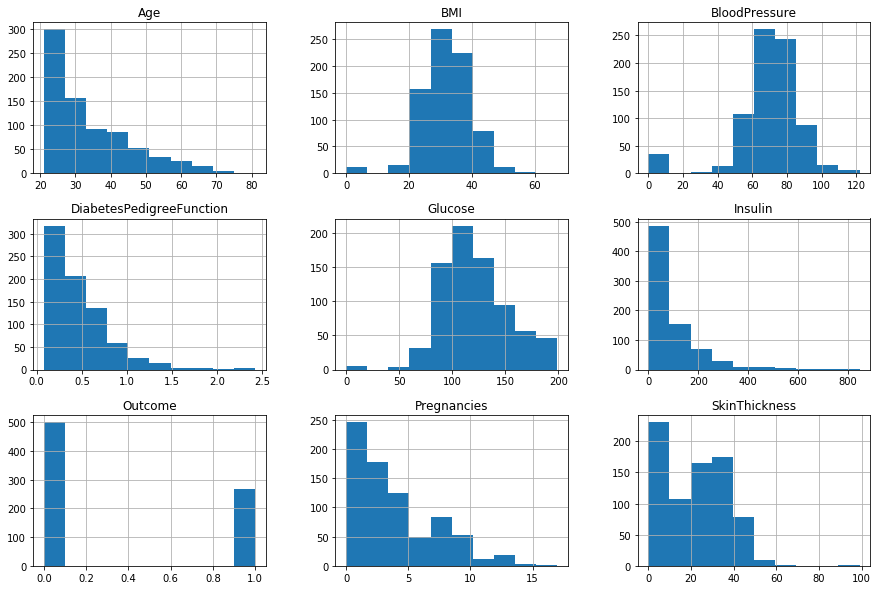

In [0]:
# Univariate graphs to see the distribution
df.hist();

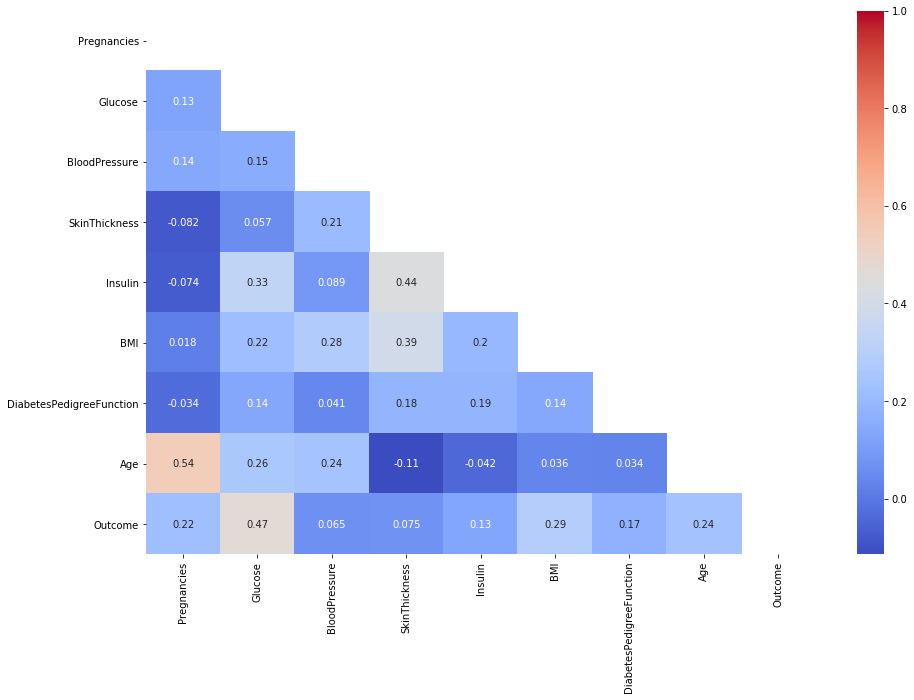

In [0]:
# Correlation Matrix
def Correlation_Matrix(df):
    Corr = df.corr()

    mask = np.zeros(Corr.shape, dtype=bool)
    mask[np.triu_indices(len(mask))] = True

    sns.heatmap(Corr, cmap = 'coolwarm', annot = True, mask = mask);

Correlation_Matrix(df);

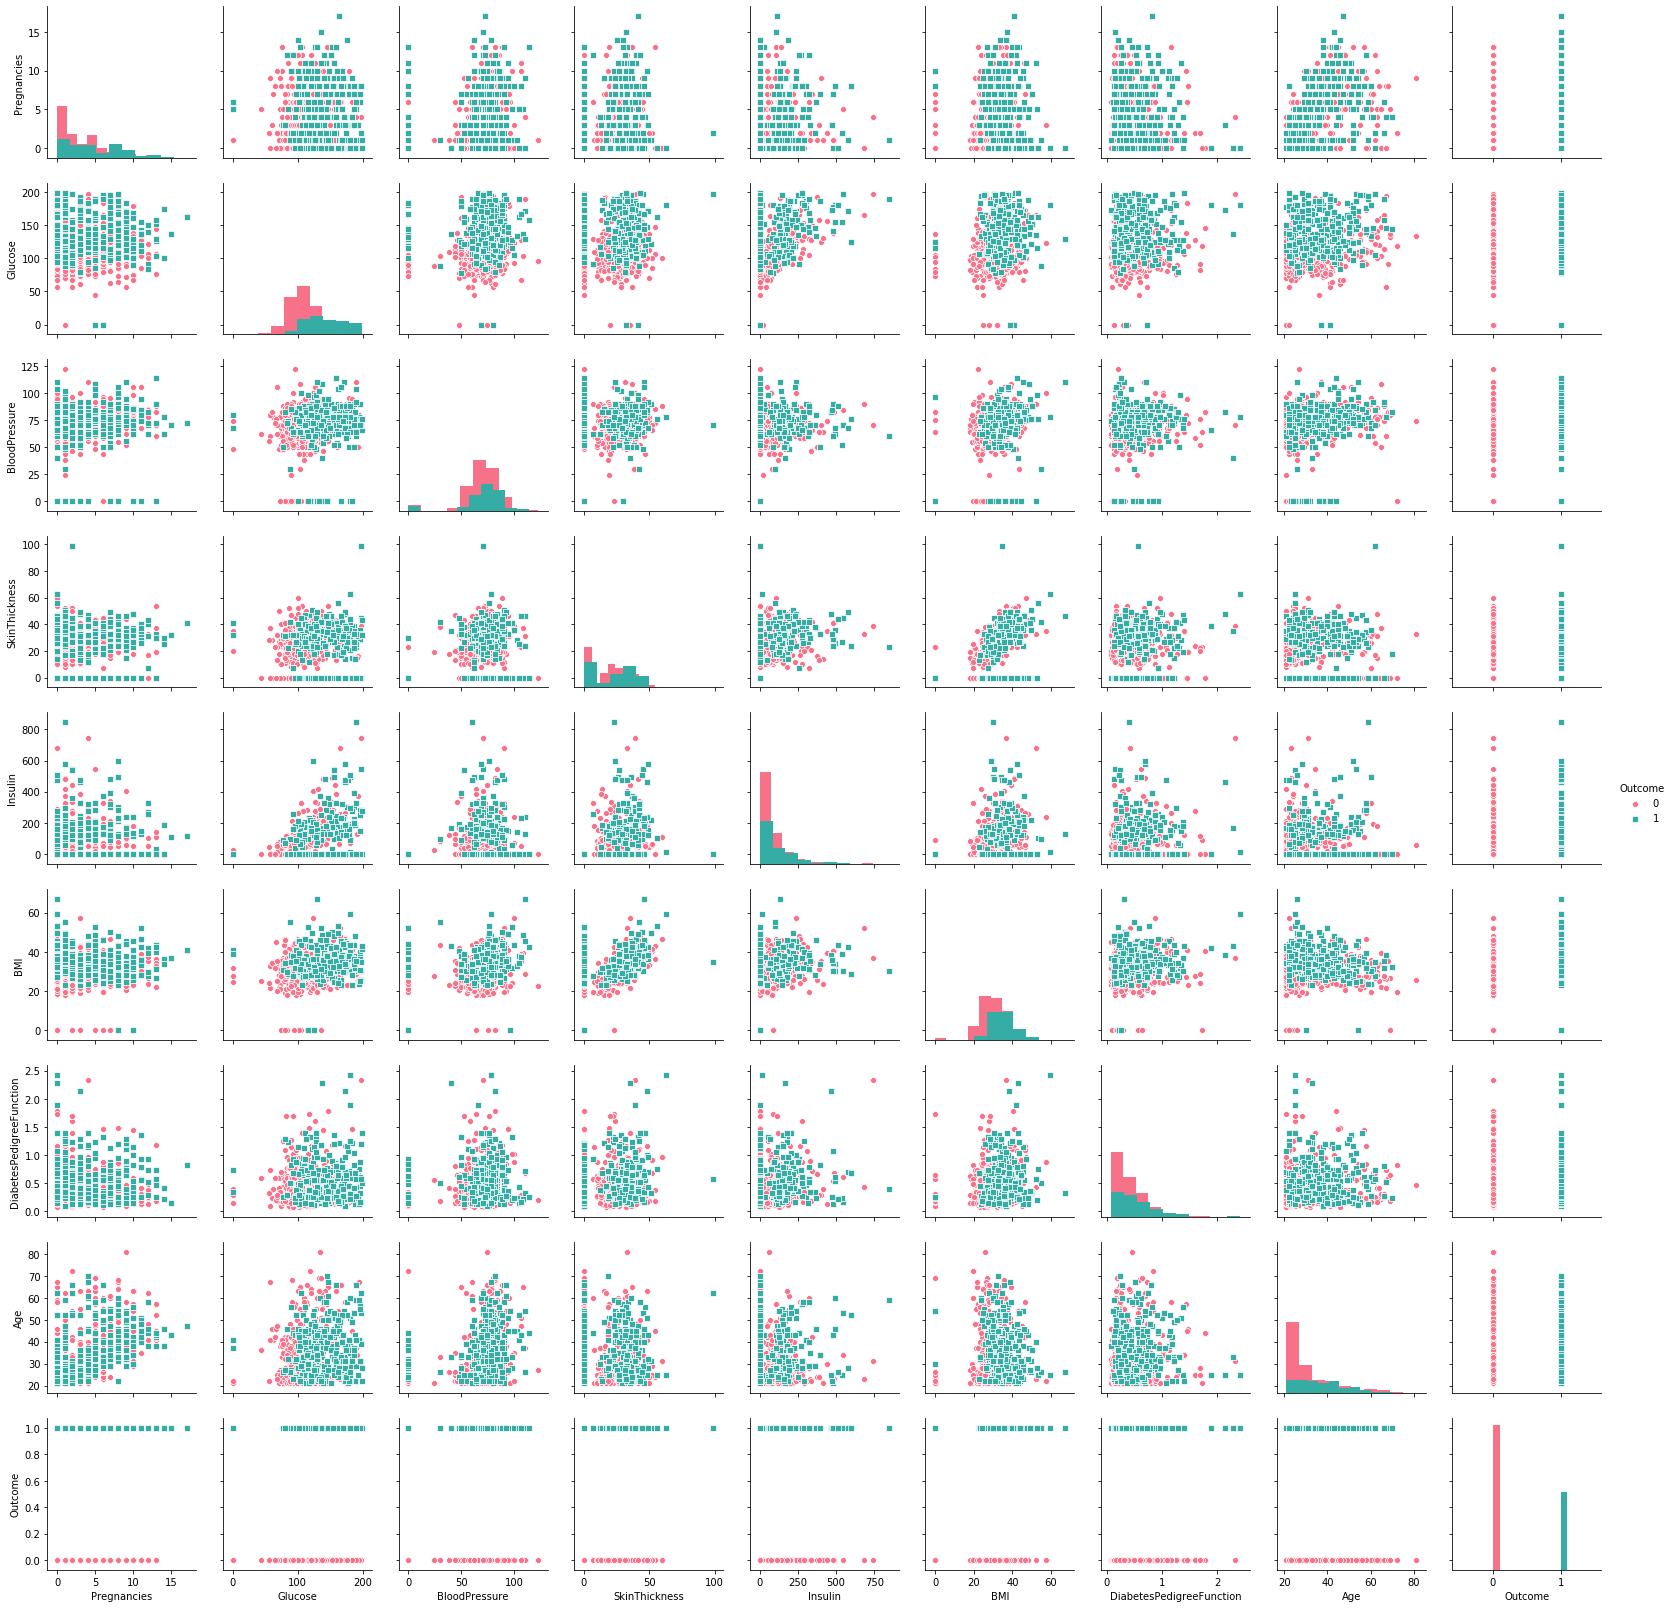

In [0]:
# pairplot
sns.pairplot(df, hue="Outcome", palette="husl", markers=["o", "s"], diag_kind='hist');

0    500
1    268
Name: Outcome, dtype: int64


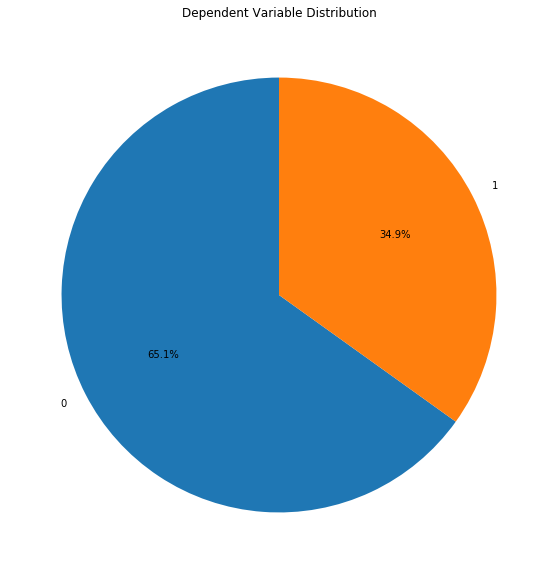

In [0]:
# Dependent Variable Distribution
def dv_distribution(df, dv):
    print(df[dv].value_counts())
    plt.pie(df[dv].value_counts().values, labels=df[dv].value_counts().keys(), startangle=90, autopct='%.1f%%')
    plt.title('Dependent Variable Distribution');

dv_distribution(df, 'Outcome')

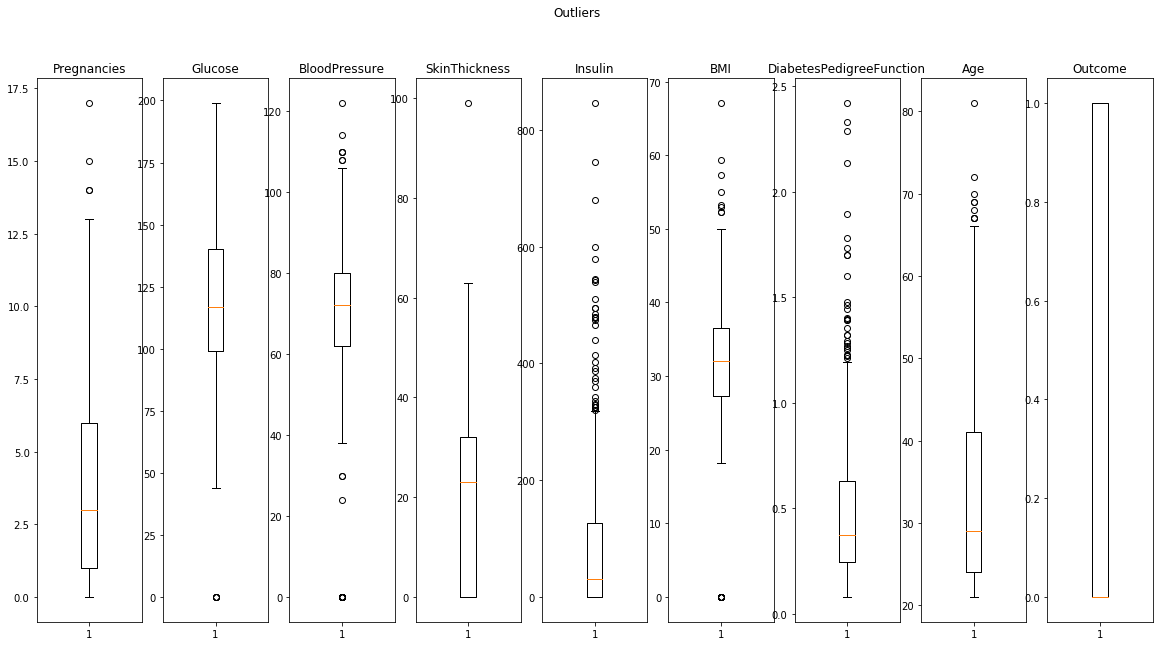

In [0]:
# Outliers Visualization
fig, axs = plt.subplots(1, len(df_name), figsize=(20, 10))

for i, col in enumerate(df_name):
    axs[i].set_title(col)
    axs[i].boxplot(df[col])
fig.suptitle('Outliers');

### Data Preprocessing

In [0]:
# Creating Dependent and Independent variables
X =  df[df_name[0:8]]
Y = df[df_name[8]]

# Dummy Variables
# X = pd.get_dummies(X, drop_first=True)
# X_cv = pd.get_dummies(X_cv, drop_first=True)

In [0]:
# Spliting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.25, random_state=0, stratify=df['Outcome'])

In [0]:
# convert to category
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')

#category_type(train)
#category_type(test)

## Baseline: Models Evaluation

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Spot-Check Algorithms (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Spot-Check Ensemble Models (Classification)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

def GetBaselineModels():
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('NB', GaussianNB()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('SVM', SVC(probability=True)))

    models.append(('AB', AdaBoostClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('ET', ExtraTreesClassifier()))
    models.append(('RF', RandomForestClassifier()))

    return models

def BaselineModelsEval(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    # evaluate each model in turn
    results = {}
    for name, model in tqdm_notebook(models):
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results[name] = cv_results

    return results

In [0]:
def ScoreDataFrame(results):
    scores = []
    names = []
    for k, r in results.items():
        names.append(k)
        scores.append(round(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})

    return scoreDataFrame

def PlotResults(results):
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(list(results.values()))
    ax.set_xticklabels(list(results.keys()));

,Model,Score
0,LR,0.7552
1,LDA,0.7604
2,NB,0.7431
3,KNN,0.6980
4,CART,0.6910
5,SVM,0.7431
6,AB,0.7552
7,GBM,0.7570
8,ET,0.7309
9,RF,0.7552


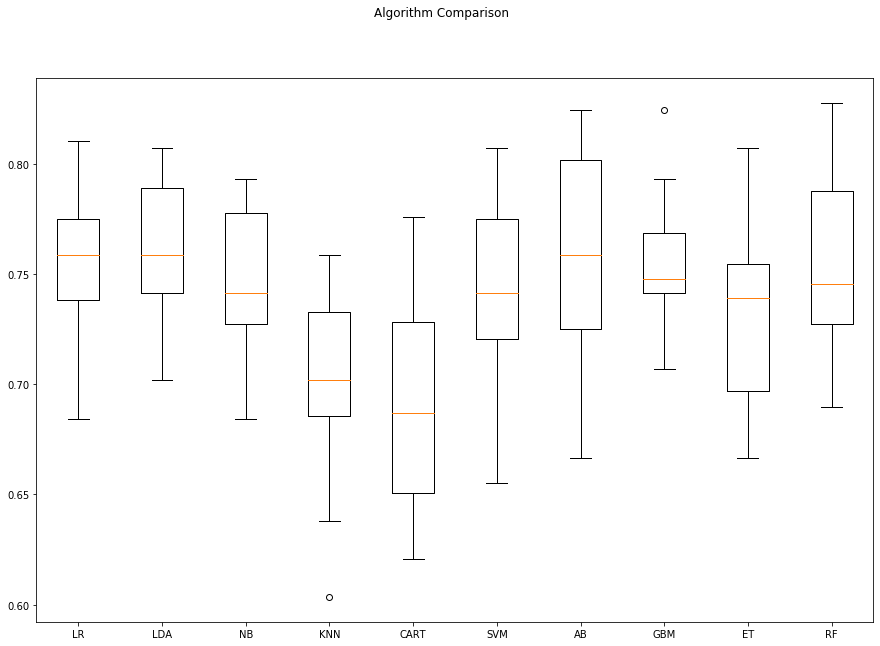

In [0]:
models = GetBaselineModels()
results = BaselineModelsEval(X_train, y_train, models)
PlotResults(results)
baselineScore = ScoreDataFrame(results)
baselineScore

## Feature Engineering

### Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])))
    
    return pipelines

,Model,Score,Model,Score
0,LR,0.7552,standardLR,0.7622
1,LDA,0.7604,standardLDA,0.7604
2,NB,0.7431,standardKNN,0.7136
3,KNN,0.6980,standardCART,0.6908
4,CART,0.6910,standardNB,0.7431
5,SVM,0.7431,standardSVM,0.7552
6,AB,0.7552,standardAB,0.7552
7,GBM,0.7570,standardGBM,0.7483
8,ET,0.7309,standardRF,0.7517
9,RF,0.7552,standardET,0.7273


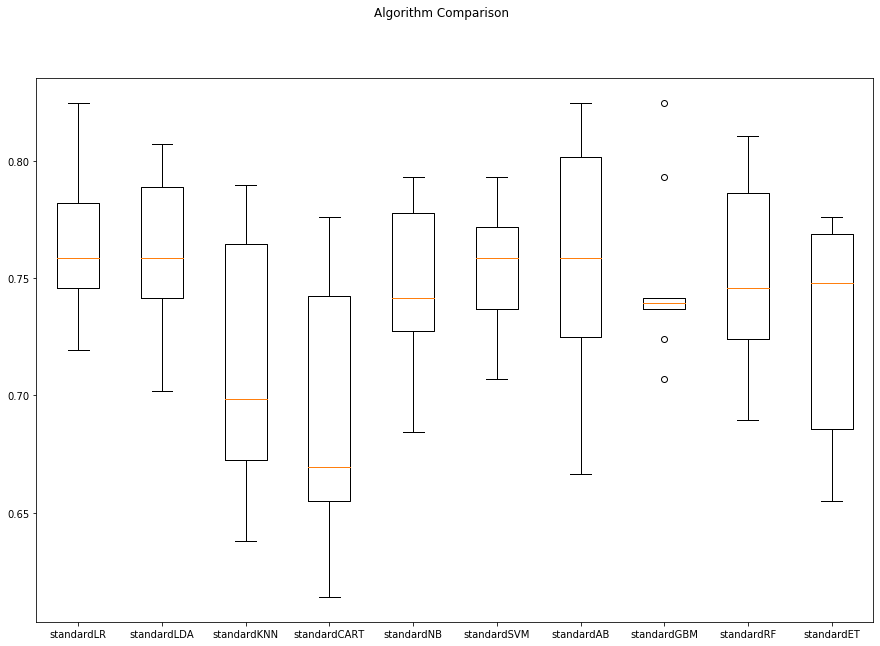

In [0]:
#standard scaler
models = GetScaledModel('standard')
results = BaselineModelsEval(X_train, y_train, models)
PlotResults(results)
scaledScoreStandard = ScoreDataFrame(results)
compareModels = pd.concat([baselineScore, scaledScoreStandard], axis=1)
compareModels

,Model,Score,Model,Score,Model,Score
0,LR,0.7552,standardLR,0.7622,minmaxLR,0.7621
1,LDA,0.7604,standardLDA,0.7604,minmaxLDA,0.7604
2,NB,0.7431,standardKNN,0.7136,minmaxKNN,0.7136
3,KNN,0.6980,standardCART,0.6908,minmaxCART,0.7012
4,CART,0.6910,standardNB,0.7431,minmaxNB,0.7431
5,SVM,0.7431,standardSVM,0.7552,minmaxSVM,0.7709
6,AB,0.7552,standardAB,0.7552,minmaxAB,0.7552
7,GBM,0.7570,standardGBM,0.7483,minmaxGBM,0.7519
8,ET,0.7309,standardRF,0.7517,minmaxRF,0.7483
9,RF,0.7552,standardET,0.7273,minmaxET,0.7431


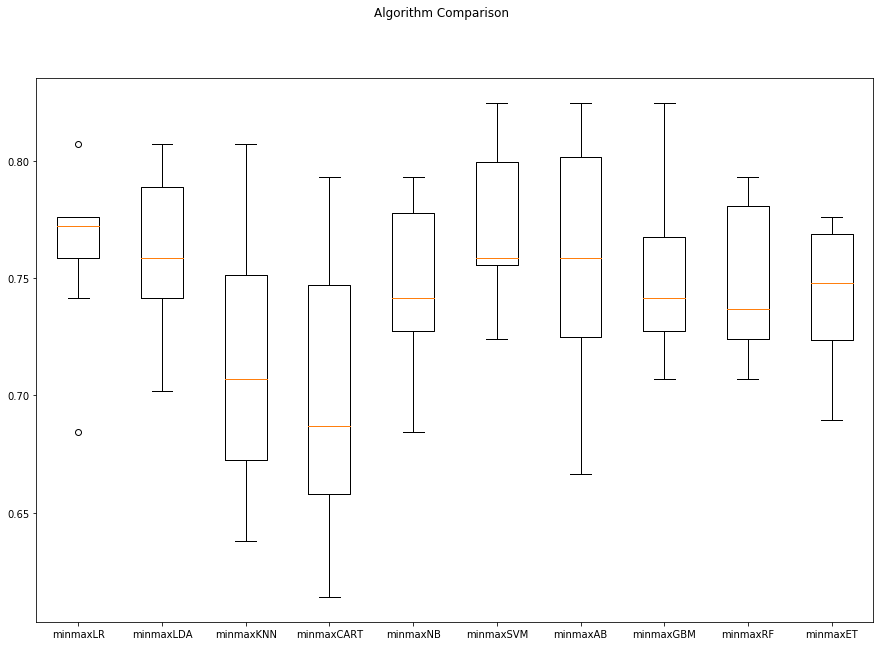

In [0]:
#minmax scaler
models = GetScaledModel('minmax')
results = BaselineModelsEval(X_train, y_train, models)
PlotResults(results)
scaledScoreMinMax = ScoreDataFrame(results)
compareModels = pd.concat([baselineScore, scaledScoreStandard, scaledScoreMinMax], axis=1)
compareModels

### Removing Outlies

In [0]:
df_t = df.copy()
df_t_name = df_t.columns

In [0]:
def Outliers(df_out, drop=False):
    
    #good_data = df_out.copy()
    for nameOfFeature in df_out.columns:
        valueOfFeature = df_out[nameOfFeature]
        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(valueOfFeature, 25.)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(valueOfFeature, 75.)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3-Q1)*1.5

        outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
        feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values

        # Remove the outliers, if any were specified
        print("\n" + "\u0332".join(nameOfFeature) + ": \n")
        print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))

        if drop:
            df_out = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
            print("New dataset with removed outliers has shape ({}, {})".format(*df_out.shape))
    
    return df_out

In [0]:
# without drop
_ = Outliers(df_t)


P̲r̲e̲g̲n̲a̲n̲c̲i̲e̲s: 

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]

G̲l̲u̲c̲o̲s̲e: 

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]

B̲l̲o̲o̲d̲P̲r̲e̲s̲s̲u̲r̲e: 

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]

S̲k̲i̲n̲T̲h̲i̲c̲k̲n̲e̲s̲s: 

Number of outliers (inc duplicates): 1 and outliers: [99]

I̲n̲s̲u̲l̲i̲n: 

Number of outliers (inc duplicates): 34 and outliers: [543 846 342 495 325 485 495 478 744 370 680 402 375 545 360 325 465 325
 415 579 474 328 480 326 330 600 321 440 540 480 335 387 392 510]

B̲M̲I: 

Number of outliers (inc duplicates): 19 and outliers: [ 0.   0.   0.   0.  53.2 55.   0.  67.1 52.3 52.3 52.9  0.   0.  59.4
  0.   0.  57.3  0.   0. ]

D̲i̲a̲b̲e̲t̲e̲s̲P̲e̲d̲i̲g̲r̲e̲e̲F̲u̲n̲c̲t̲i̲o̲n: 

Number of outliers (inc duplicates): 29 and

In [0]:
# with drop
df_clean = Outliers(df_t, drop=True)


P̲r̲e̲g̲n̲a̲n̲c̲i̲e̲s: 

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has shape (764, 9)

G̲l̲u̲c̲o̲s̲e: 

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has shape (759, 9)

B̲l̲o̲o̲d̲P̲r̲e̲s̲s̲u̲r̲e: 

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has shape (714, 9)

S̲k̲i̲n̲T̲h̲i̲c̲k̲n̲e̲s̲s: 

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has shape (713, 9)

I̲n̲s̲u̲l̲i̲n: 

Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has shape (686, 9)

B̲M̲I: 

Number of 

In [0]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


#### Model evaluation on Cleaned Data

In [0]:
df_clean_name = df_clean.columns

X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]

X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c, Y_c, test_size=0.25, random_state=0,
                                                   stratify=df_clean['Outcome'])

,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.7552,standardLR,0.7622,minmaxLR,0.7621,minmaxLR,0.7758
1,LDA,0.7604,standardLDA,0.7604,minmaxLDA,0.7604,minmaxLDA,0.7822
2,NB,0.7431,standardKNN,0.7136,minmaxKNN,0.7136,minmaxKNN,0.7441
3,KNN,0.6980,standardCART,0.6908,minmaxCART,0.7012,minmaxCART,0.6942
4,CART,0.6910,standardNB,0.7431,minmaxNB,0.7431,minmaxNB,0.7591
5,SVM,0.7431,standardSVM,0.7552,minmaxSVM,0.7709,minmaxSVM,0.7633
6,AB,0.7552,standardAB,0.7552,minmaxAB,0.7552,minmaxAB,0.7129
7,GBM,0.7570,standardGBM,0.7483,minmaxGBM,0.7519,minmaxGBM,0.7570
8,ET,0.7309,standardRF,0.7517,minmaxRF,0.7483,minmaxRF,0.7696
9,RF,0.7552,standardET,0.7273,minmaxET,0.7431,minmaxET,0.7590


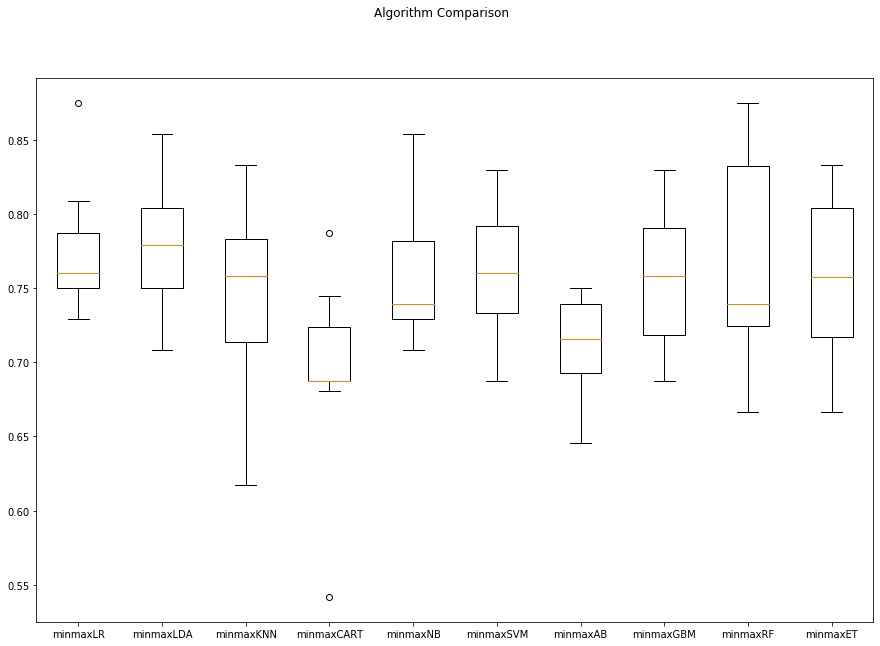

In [0]:
models = GetScaledModel('minmax')
results = BaselineModelsEval(X_train_c, y_train_c, models)
PlotResults(results)
scaledScoreMinMax_c = ScoreDataFrame(results)
compareModels = pd.concat([baselineScore, scaledScoreStandard, scaledScoreMinMax, scaledScoreMinMax_c], axis=1)
compareModels

### Feature Selection

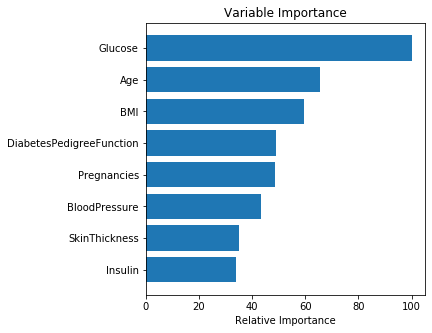

In [0]:
 def FeatureSelection(X, y): 
    clf = ExtraTreesClassifier(n_estimators=250, random_state=SEED)
    clf.fit(X, y)

    # Plot feature importance
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(5,5))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance');

FeatureSelection(X_train_c, y_train_c)

#### Model evaluation on Feature Selection

In [0]:
df_feature_imp = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_feature_imp_name = df_feature_imp.columns

In [0]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]

X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X, Y, test_size=0.1, random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

,Model,Score,Model,Score,Model,Score,Model,Score,Model,Score
0,LR,0.7552,standardLR,0.7622,minmaxLR,0.7621,minmaxLR,0.7758,minmaxLR,0.7834
1,LDA,0.7604,standardLDA,0.7604,minmaxLDA,0.7604,minmaxLDA,0.7822,minmaxLDA,0.7817
2,NB,0.7431,standardKNN,0.7136,minmaxKNN,0.7136,minmaxKNN,0.7441,minmaxKNN,0.7571
3,KNN,0.6980,standardCART,0.6908,minmaxCART,0.7012,minmaxCART,0.6942,minmaxCART,0.6993
4,CART,0.6910,standardNB,0.7431,minmaxNB,0.7431,minmaxNB,0.7591,minmaxNB,0.7817
5,SVM,0.7431,standardSVM,0.7552,minmaxSVM,0.7709,minmaxSVM,0.7633,minmaxSVM,0.7903
6,AB,0.7552,standardAB,0.7552,minmaxAB,0.7552,minmaxAB,0.7129,minmaxAB,0.7554
7,GBM,0.7570,standardGBM,0.7483,minmaxGBM,0.7519,minmaxGBM,0.7570,minmaxGBM,0.7536
8,ET,0.7309,standardRF,0.7517,minmaxRF,0.7483,minmaxRF,0.7696,minmaxRF,0.7607
9,RF,0.7552,standardET,0.7273,minmaxET,0.7431,minmaxET,0.7590,minmaxET,0.7658


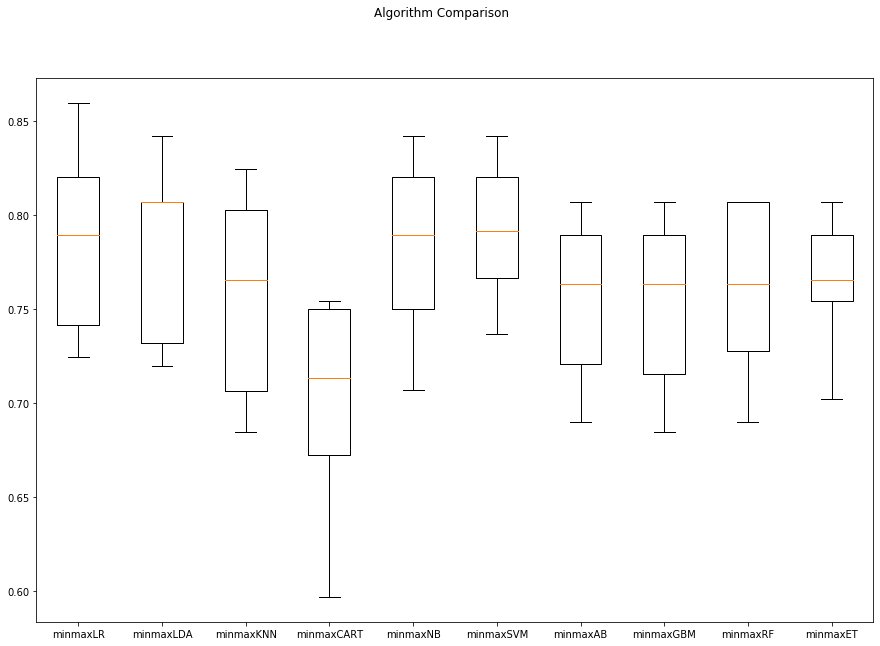

In [0]:
models = GetScaledModel('minmax')
results = BaselineModelsEval(X_train_im, y_train_im,models)
PlotResults(results)
scaledScoreMinMax_im = ScoreDataFrame(results)
compareModels = pd.concat([baselineScore,
                           scaledScoreStandard,
                           scaledScoreMinMax,
                           scaledScoreMinMax_c,
                           scaledScoreMinMax_im], axis=1)
compareModels

## Parameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

In [0]:
df_imp_scaled = MinMaxScaler().fit_transform(df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']])
df_imp_scaled_name = df_clean.columns

X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X, Y, test_size=0.1, random_state=0,
                                                   stratify=df_imp_scaled[:,4])

### Grid Seach/ Random Search

In [0]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [0]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [0]:
models = {LogisticRegression(): dict(C=uniform(loc=0, scale=4), penalty = ['l1', 'l2']),
          KNeighborsClassifier(): dict(n_neighbors=[i for i in range(1, 21)]),
          SVC(): dict(C=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0], kernel=['linear', 'poly', 'rbf', 'sigmoid']),
          DecisionTreeClassifier(): dict(max_depth=[3,None], max_features=randint(1, 4), min_samples_leaf=randint(1, 4), criterion=["gini", "entropy"]),
          AdaBoostClassifier(): dict(learning_rate=[.01,.05,.1,.5,1], n_estimators=[50,100,150,200,250,300]),
          GradientBoostingClassifier(): dict(learning_rate=[.01,.05,.1,.5,1], n_estimators=[50,100,150,200,250,300]),
          RandomForestClassifier(): dict(n_estimators=[50,100,150,200,250,300], max_depth=[5,8,15,25,30], min_samples_split=[2,5,10,15,100], min_samples_leaf = [1,2,5,10]),
          ExtraTreesClassifier(): dict(n_estimators=[50,100,150,200,250,300], min_samples_split=[2,5,10,15,100], min_samples_leaf = [1,2,5,10])}

In [0]:
for model, hyperparameters in tqdm_notebook(models.items()):
    print("\u0332".join(type(model).__name__))
    _ = RandomSearch(X_train_sc, y_train_sc, model, hyperparameters)
    _ = _.BestModelPridict(X_test_sc)
    print("\n")

L̲o̲g̲i̲s̲t̲i̲c̲R̲e̲g̲r̲e̲s̲s̲i̲o̲n
Best: 0.786903 using {'C': 3.730229437354635, 'penalty': 'l2'}


K̲N̲e̲i̲g̲h̲b̲o̲r̲s̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r
Best: 0.809558 using {'n_neighbors': 15}


S̲V̲C
Best: 0.792075 using {'kernel': 'poly', 'C': 0.1}


D̲e̲c̲i̲s̲i̲o̲n̲T̲r̲e̲e̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r
Best: 0.765820 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}


A̲d̲a̲B̲o̲o̲s̲t̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r
Best: 0.800817 using {'n_estimators': 150, 'learning_rate': 0.05}


G̲r̲a̲d̲i̲e̲n̲t̲B̲o̲o̲s̲t̲i̲n̲g̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r
Best: 0.774622 using {'n_estimators': 200, 'learning_rate': 0.01}


R̲a̲n̲d̲o̲m̲F̲o̲r̲e̲s̲t̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r
Best: 0.797399 using {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 30}


E̲x̲t̲r̲a̲T̲r̲e̲e̲s̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r
Best: 0.797338 using {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1}




## Ensemble Methods

### VotingClassifier

In [0]:
from sklearn.ensemble import VotingClassifier

# best params from parameter tuning step
param = {'C': 3.730229437354635, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'kernel': 'poly', 'C': 0.1}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 200}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

param = {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 30}
model8 = RandomForestClassifier(**param)

param = {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1}
model9 = ExtraTreesClassifier(**param)


# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]

In [0]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())

ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.7868723532970356
Accuracy on test: 0.828125


### Predict and Error Corrolation

In [0]:
def get_models():
    param = {'C': 3.730229437354635, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'kernel': 'poly', 'C': 0.1, 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 200}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    param = {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 30}
    model8 = RandomForestClassifier(**param)

    param = {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1}
    model9 = ExtraTreesClassifier(**param)

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

In [0]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(tqdm_notebook(models.items())):
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)

    P.columns = cols
    return P

In [0]:
models = get_models()
P = train_predict(models, X_train_sc, X_test_sc, y_train_sc, y_test_sc)

Fitting models.


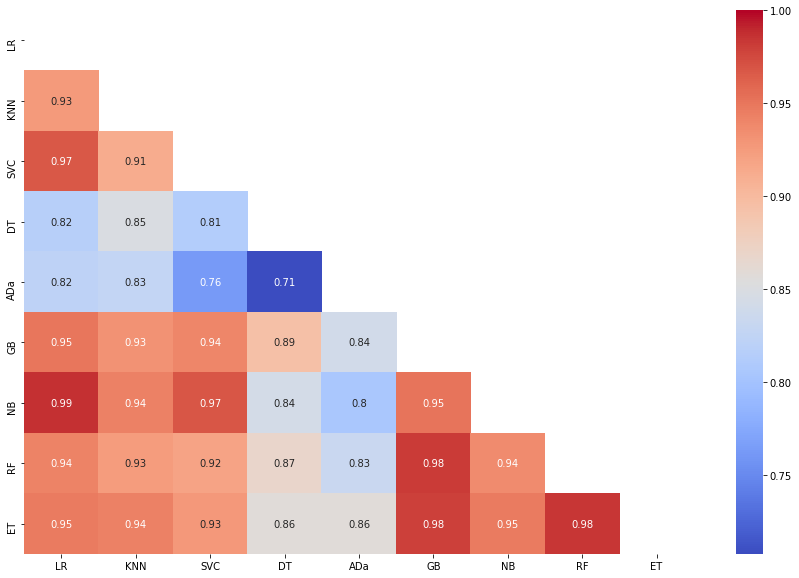

In [0]:
Correlation_Matrix(P)

error correlations on a class prediction basis things look a bit more promising:

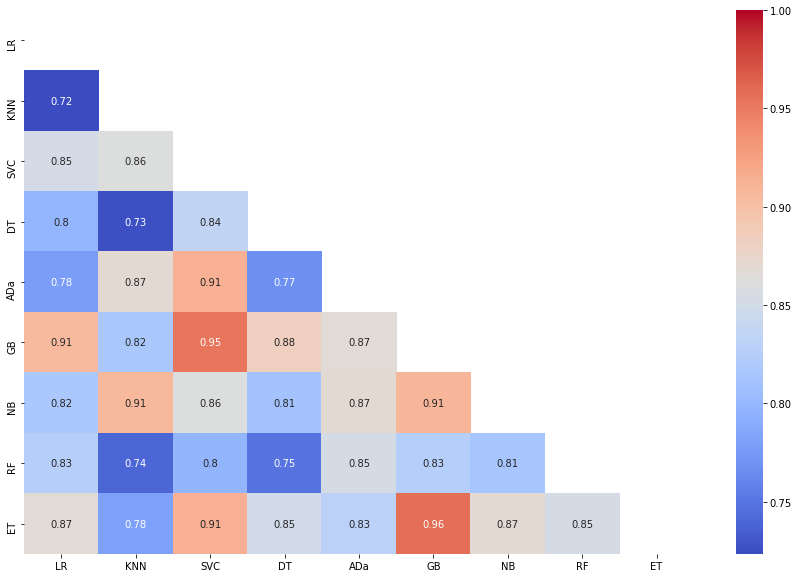

In [0]:
Correlation_Matrix(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc))

### Stacking

In [0]:
base_learners = get_models()

meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

In [0]:
from mlens.ensemble import SuperLearner

# create the super learner
def get_super_learner():
	ensemble = SuperLearner(scorer=accuracy_score, folds=10, random_state=SEED, verbose=True)
	# add base models
	ensemble.add(list(base_learners.values()), proba=True)
	# add the meta model
	ensemble.add_meta(meta_learner, proba=True)
 
	return ensemble

In [0]:
ensemble = get_super_learner()

# Train the ensemble
ensemble.fit(X_train_sc, y_train_sc)

# Predict the test set
p_ensemble = ensemble.predict_proba(X_test_sc)


Fitting 2 layers
Fit complete                        | 00:00:19

Predicting 2 layers
Predict complete                    | 00:00:00


In [0]:
pp = []
for p in p_ensemble[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [0]:
print("Super Learner Accuracy score: %.8f" % (y_test_sc == pp).mean())

Super Learner Accuracy score: 0.85937500


## Save Models

In [0]:
from sklearn.externals import joblib

# Output a pickle file for the model
joblib.dump(ensemble, 'super_learner.pkl') 
 
# Load the pickle file
clf_load = joblib.load('super_learner.pkl')

# Check that the loaded model is the same as the original
clf_load.scorer(y_test_sc, pp) == ensemble.scorer(y_test_sc, pp)

True